
Credit Card Fraud Detection


Disponível em :
    https://www.kaggle.com/code/renanmour4/credit-card-fraud-detection


O problema

Alguém da sua família, conhecido ou até você mesmo, já pode ter passado por um problema com cartões de crédito, onde na hora da fatura chegar, percebeu que houve compra que não foi o dono do cartão que fez, e sim, outra pessoa.

Para prevenir este problema, bancos e outras empresas utilizam IA para detectar essas fraudes e conseguir bloquear a operação rapidamente. Este notebook utiliza uma base de dados para prever se uma operação é fraudulenta ou não.

In [69]:
# importando os pacotes necessários
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import metrics
from scipy.stats import ks_2samp
from scipy.stats import t
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import pycaret


In [70]:
#Carregando os dados
df = pd.read_csv("C:/Users/Andrea/OneDrive/Área de Trabalho/EBAC/creditcard.csv")
# visualizar as 10 primeiras entradas
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Exploração de Dados

In [71]:
#a base quanto ao número de linhas e colunas
print('DIMENSÕES DO DATAFRAME:')
print(f'Linhas:  {df.shape[0]}')
print(f'Colunas:  {df.shape[1]}')

DIMENSÕES DO DATAFRAME:
Linhas:  284807
Colunas:  31


In [72]:
#número de entradas (linhas) e colunas no DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [73]:
#gerando estatísticas descritivas para o DataFrame, como média, desvio padrão e quartis.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [74]:
#contando a quantidade de valores nulos em cada coluna do DataFrame.
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [75]:
#imprimindo os valores únicos do DataFrame, ordenados de forma crescente de acordo com a contagem de valores únicos 
#em cada coluna.
print('VALORES ÚNICOS: \n')
print(df.nunique().sort_values())

VALORES ÚNICOS: 

Class          2
Amount     32767
Time      124592
V3        275663
V28       275663
V27       275663
V26       275663
V25       275663
V24       275663
V23       275663
V22       275663
V21       275663
V20       275663
V19       275663
V18       275663
V17       275663
V16       275663
V1        275663
V14       275663
V13       275663
V12       275663
V11       275663
V10       275663
V9        275663
V8        275663
V7        275663
V6        275663
V5        275663
V4        275663
V2        275663
V15       275663
dtype: int64


In [76]:
# Check the dataset shape
print(df.shape)
# Check summary statistics
print(df.describe())
# Check class distribution
print(df['Class'].value_counts())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [77]:
# análise simples para contar quantas ocorrências existem em cada classe no DataFrame 
number_of_fraud = len(df[df.Class == 1])
number_of_normal= len(df[df.Class == 0])

print ("Fraude:", number_of_fraud)
print ("Normal:",number_of_normal)

Fraude: 492
Normal: 284315


<Axes: xlabel='Class', ylabel='count'>

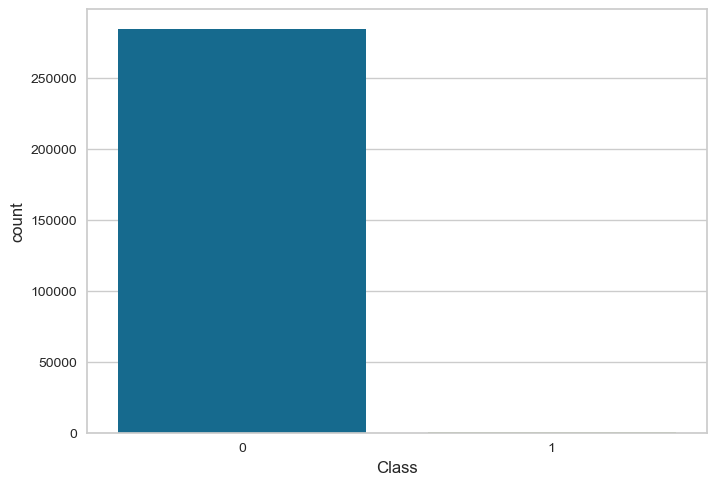

In [78]:
# Plotar a contagem de valores na coluna "Class" do DataFrame df
sns.countplot(x="Class", data=df)

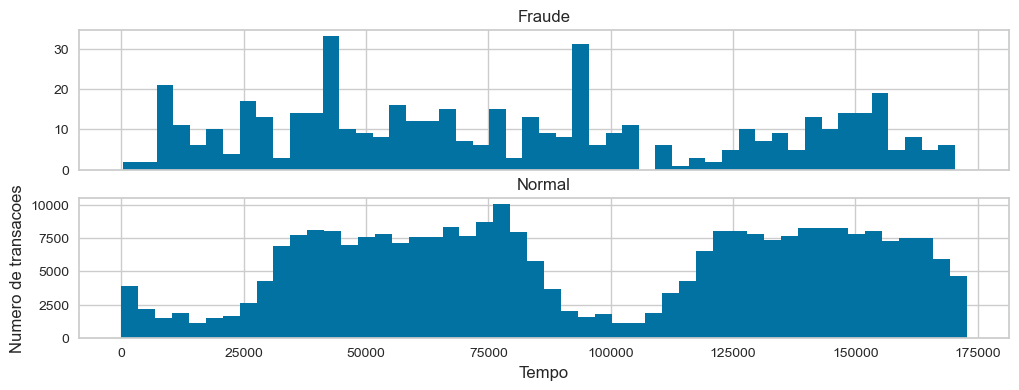

In [79]:
#gráfico com duas subplots verticalmente empilhadas

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraude')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Tempo')
plt.ylabel('Numero de transacoes')
plt.show()



In [80]:
#Análises estatísticas descritivas separadas para as transações rotuladas como "Fraude" e "Normal"

print ("Fraude")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Amount[df.Class == 0].describe())



Fraude
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


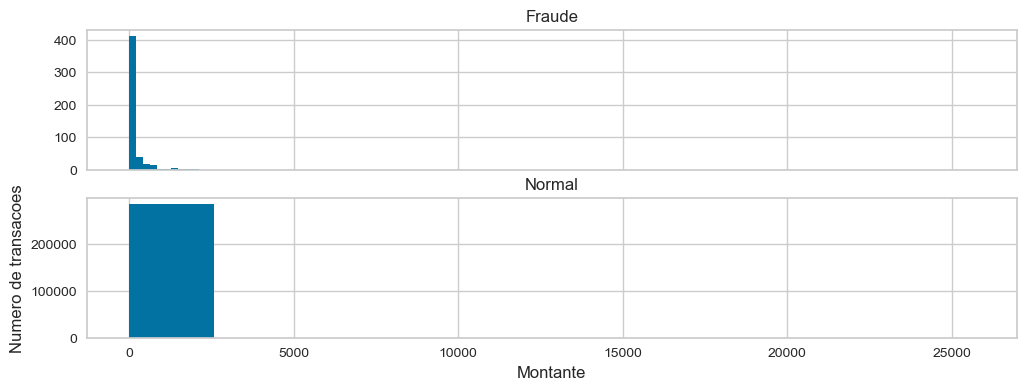

In [81]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 10

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraude')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Montante')
plt.ylabel('Numero de transacoes')
plt.show()

In [82]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Divisão de Dados

In [83]:
df = df.drop(columns = ['Time'], axis = 1)

In [84]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


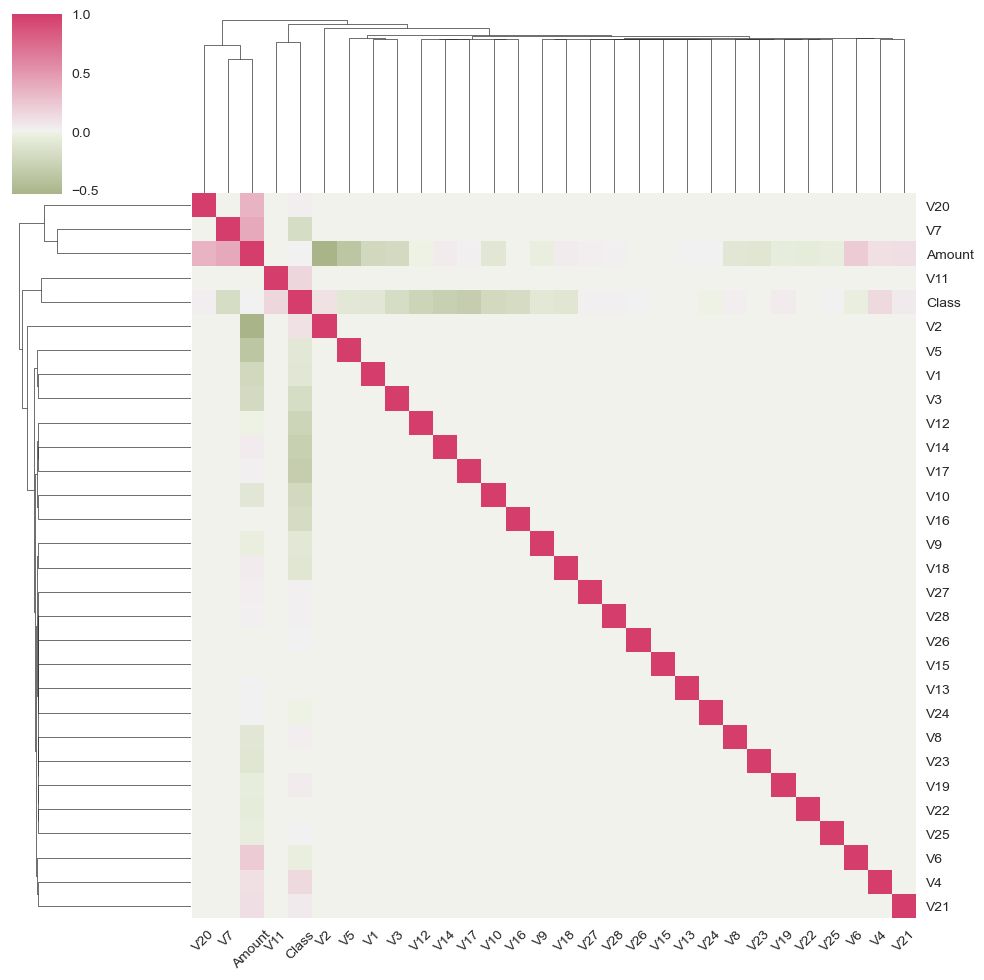

In [85]:
cmap = sns.diverging_palette(h_neg=100, 
                             h_pos=359, 
                             as_cmap=True, 
                             sep=1, 
                             center = 'light')

ax = sns.clustermap(data=df.corr(), 
               figsize=(10, 10), 
               center=0, 
               cmap=cmap)
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=45)

plt.show()

Preparando os dados para modelagem de machine learning, onde X representará as features e y representará o alvo (target).

In [86]:
#separar as variáveis explicativas da variável dependente
#usando a função drop do Pandas para remover a coluna 'Class' do DataFrame, 
#armazenando o resultado em X, e atribuindo a coluna 'Class' a Y.

X = df.drop(columns=['Class'], axis=1)
y = df.Class

In [87]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [88]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [89]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df.nunique()

metadados

,dtype,valores_unicos
V1,float64,275663
V2,float64,275663
V3,float64,275663
V4,float64,275663
V5,float64,275663
V6,float64,275663
V7,float64,275663
V8,float64,275663
V9,float64,275663
V10,float64,275663


In [90]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['ep'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [91]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df.nunique()
metadados['variavel'] = 'covariavel'
metadados.loc['mau','variavel'] = 'resposta'
metadados.loc['bom','variavel'] = 'resposta'
metadados

,dtype,valores_unicos,variavel
V1,float64,275663.0,covariavel
V2,float64,275663.0,covariavel
V3,float64,275663.0,covariavel
V4,float64,275663.0,covariavel
V5,float64,275663.0,covariavel
V6,float64,275663.0,covariavel
V7,float64,275663.0,covariavel
V8,float64,275663.0,covariavel
V9,float64,275663.0,covariavel
V10,float64,275663.0,covariavel


In [92]:
def biv_discreta(var, df):
    df['bom'] = 1-df.mau
    g = df.groupby(var)
    
    biv = pd.DataFrame({'qt_bom': g['bom'].sum(),
                       'qt_mau': g['bom'].sum(),
                       'mau':g['bom'].mean(),
                       var: g['bom'].mean().index,
                       'cont':g[var].count()})
    biv['ep'] = (biv.mau*(1-biv.mau)/biv.cont)**.5
    biv['mau_sup'] = biv.mau+t.ppf([0.975], biv.cont-1)*biv.ep
    biv['mau_inf'] = biv.mau+t.ppf([0.025], biv.cont-1)*biv.ep
    
    biv['logit'] = np.log(biv.mau/(1-biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup/(1-biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_sup/(1-biv.mau_inf))
    
    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))
    
    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral
    
    fig, ax = plt.subplots(2,1, figsize=(8,6))
    ax[0].plot(biv[var], biv.woe,  ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite superior')
        
    num_cat = biv.shape[0]
    ax[0].set_xlim([-.3, num_cat-.7])
    
    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)
    
    ax[0].set_xticks(list(range(num_cat)))
    ax[0].set_xticklabels(biv[var], rotation=15)
    
    ax[1] = biv.cont.plot.bar()
    return biv

In [93]:
#Criando um pipeline utilizando o sklearn pipeline para o preprocessamento

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split

from pycaret.regression import create_model


X_digits, y_digits = load_digits(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)


pca = PCA(n_components=20)

scaler = StandardScaler()

logistic = LogisticRegression(max_iter=200)

In [94]:
X_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [95]:
X_digits.shape

(1797, 64)

Dataset de treino

In [96]:
# "Fitando" e aplicando Z score nos dados de treino
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [97]:
# "Fitando" e aplicando o pca nos dados de treino
pca.fit(X_train)
X_train = pca.transform(X_train)

In [98]:
# "Fitando" e predizendo uma regressão logística nos dados de treino
logistic.fit(X_train, y_train)

logistic.predict(X_train)

array([0, 0, 0, ..., 2, 1, 2])

Dataset de teste

In [99]:
# Aplicando nos dados de teste o Z score "fitado" nos dados de treino  
X_test = scaler.transform(X_test)

In [100]:
# Aplicando nos dados de teste o PCA "fitado" nos dados de treino  
X_test = pca.transform(X_test)

In [101]:
# Predizendo nos dados de teste o modelo "fitado" nos dados de treino
logistic.predict(X_test)

array([5, 2, 5, 4, 8, 3, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 9, 6, 1, 9, 4, 4, 5, 8, 4, 8, 5, 9, 7, 8, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 9, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 5, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 5, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [102]:
#Usando pipeline
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

# Define a PCA to Linear dimensionality reduction
pca_pipe = PCA(n_components=15)

# Define a Standard Scaler to normalize inputs
scaler_pipe = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic_pipe = LogisticRegression(max_iter=200)

In [103]:
pipe = Pipeline(steps=[("scaler", scaler_pipe), 
                       ("pca", pca_pipe), 
                       ("logistic", logistic_pipe)])

Analisando o objeto

In [104]:
pipe.named_steps

{'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'pca': PCA(copy=True, iterated_power='auto', n_components=15, n_oversamples=10,
     power_iteration_normalizer='auto', random_state=None, svd_solver='auto',
     tol=0.0, whiten=False),
 'logistic': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=200,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)}

DAdos de treino

In [105]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=15,
                     n_oversamples=10, power_iteration_normalizer='auto',
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=200,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [106]:
pipe.predict(X_train)

array([0, 0, 0, ..., 1, 8, 2])

In [107]:
pipe.predict(X_test)

array([5, 2, 5, 4, 8, 1, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 3, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 3, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 8, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 4, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 9, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 8, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 0, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 8, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [108]:
pipe.named_steps

{'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'pca': PCA(copy=True, iterated_power='auto', n_components=15, n_oversamples=10,
     power_iteration_normalizer='auto', random_state=None, svd_solver='auto',
     tol=0.0, whiten=False),
 'logistic': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=200,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)}

In [109]:
pipe[0]

StandardScaler(copy=True, with_mean=True, with_std=True)

In [110]:
pipe[1]

PCA(copy=True, iterated_power='auto', n_components=15, n_oversamples=10,
    power_iteration_normalizer='auto', random_state=None, svd_solver='auto',
    tol=0.0, whiten=False)

In [111]:
pipe[2]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
pipe[1].transform(X_train)

array([[  0.87098118, -12.61627548, -18.95636206, ...,   5.01565502,
         15.85713555,   3.45249568],
       [  7.38999967,  -7.8462582 , -16.49089997, ...,   8.31141347,
         19.76535663,   2.30808142],
       [  8.28997347, -10.02856147, -14.17202324, ...,   8.75537397,
         26.95990763,   3.38423872],
       ...,
       [-12.90639224, -12.77045067,  16.6913589 , ...,   1.40701008,
         10.13274987,   6.00169827],
       [-12.2019698 ,  -2.5879686 ,   7.00728614, ...,   8.37406115,
          9.7228206 ,   2.29038777],
       [-11.21462369,   2.61293796,   2.68234595, ...,   3.77403667,
         18.29911288,  -5.51827037]])

In [113]:
pca_pipe.transform(X_train)

array([[  0.87098118, -12.61627548, -18.95636206, ...,   5.01565502,
         15.85713555,   3.45249568],
       [  7.38999967,  -7.8462582 , -16.49089997, ...,   8.31141347,
         19.76535663,   2.30808142],
       [  8.28997347, -10.02856147, -14.17202324, ...,   8.75537397,
         26.95990763,   3.38423872],
       ...,
       [-12.90639224, -12.77045067,  16.6913589 , ...,   1.40701008,
         10.13274987,   6.00169827],
       [-12.2019698 ,  -2.5879686 ,   7.00728614, ...,   8.37406115,
          9.7228206 ,   2.29038777],
       [-11.21462369,   2.61293796,   2.68234595, ...,   3.77403667,
         18.29911288,  -5.51827037]])

In [114]:
#Aplicando o get_dummies() para transformar colunas catégoricas do dataframe em colunas de 0 e 1
dummy = pd.get_dummies(df, columns=['Class'])

In [115]:
dummy

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class_0,Class_1
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,1,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,1,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,1,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,1,0


In [116]:
dummy.dtypes

V1         float64
V2         float64
V3         float64
V4         float64
V5         float64
V6         float64
V7         float64
V8         float64
V9         float64
V10        float64
V11        float64
V12        float64
V13        float64
V14        float64
V15        float64
V16        float64
V17        float64
V18        float64
V19        float64
V20        float64
V21        float64
V22        float64
V23        float64
V24        float64
V25        float64
V26        float64
V27        float64
V28        float64
Amount     float64
Class_0      uint8
Class_1      uint8
dtype: object

In [117]:
#utilizando o pycaret para pre processar os dados e rodar o modelo
from pycaret.classification import *

# Carregar os dados
df = pd.read_csv("C:/Users/Andrea/OneDrive/Área de Trabalho/EBAC/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [118]:
# Remover a coluna 'Time' do DataFrame
df = df.drop(['Time'], axis=1)

In [119]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [120]:
dataset = df.sample()

In [121]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [122]:
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(df.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (270567, 30)
Conjunto de dados não usados no treino/teste, apenas como validação: (0, 30)


Alterando os dados de treino


In [123]:
from pycaret.classification import *

In [124]:
data.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [125]:
data.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000e+00,-0.002568,0.002306,-0.000166,0.003569,-0.000281,-0.000513,-0.002582,0.000093,0.000814,...,0.000114,0.000329,-0.000137,5.881859e-07,-0.000131,6.428754e-04,0.004240,-0.005166,-0.228185,-0.103004
V2,-2.568171e-03,1.000000,-0.001089,0.001188,0.001845,-0.002541,-0.004103,0.001799,0.000608,-0.000249,...,-0.000464,0.000399,0.000281,4.856840e-04,-0.000238,9.954364e-04,0.005307,-0.007736,-0.533004,0.092647
V3,2.305538e-03,-0.001089,1.000000,-0.001185,0.002653,0.001100,0.001386,-0.002527,0.000702,0.001956,...,0.000608,0.000471,0.000164,-1.095808e-04,-0.000599,2.601109e-04,0.000166,-0.001804,-0.211551,-0.195056
V4,-1.664651e-04,0.001188,-0.001185,1.000000,-0.001498,0.001545,-0.000173,0.000315,-0.000539,-0.002031,...,0.000828,-0.000276,-0.000520,-2.876880e-04,0.000126,-3.043559e-04,-0.001373,0.001779,0.099582,0.134535
V5,3.568505e-03,0.001845,0.002653,-0.001498,1.000000,0.001371,0.003657,-0.001028,0.000051,0.001005,...,0.001249,0.000034,0.002261,-7.050951e-04,0.000871,-8.700401e-04,-0.003291,0.000759,-0.386588,-0.096589
V6,-2.805068e-04,-0.002541,0.001100,0.001545,0.001371,1.000000,0.001078,0.001891,0.000451,0.001303,...,0.000310,-0.000170,-0.001104,-9.051440e-05,-0.000281,5.279149e-04,0.001767,-0.000599,0.216044,-0.044619
V7,-5.131489e-04,-0.004103,0.001386,-0.000173,0.003657,0.001078,1.000000,-0.006020,0.001584,0.002349,...,-0.002197,0.001131,-0.002037,8.545714e-04,-0.001690,-1.214825e-04,0.001926,0.002276,0.398052,-0.190204
V8,-2.581956e-03,0.001799,-0.002527,0.000315,-0.001028,0.001891,-0.006020,1.000000,-0.001555,-0.002120,...,-0.006439,0.002039,0.001086,-2.439331e-04,-0.000401,-6.264136e-04,0.002888,-0.000988,-0.103739,0.021737
V9,9.336205e-05,0.000608,0.000702,-0.000539,0.000051,0.000451,0.001584,-0.001555,1.000000,0.001104,...,-0.001200,0.000490,0.001357,2.588825e-06,0.000148,4.077567e-04,-0.002156,0.000593,-0.043878,-0.098906
V10,8.140691e-04,-0.000249,0.001956,-0.002031,0.001005,0.001303,0.002349,-0.002120,0.001104,1.000000,...,-0.001120,0.000066,0.002031,2.300393e-04,-0.000098,5.819113e-04,-0.001181,-0.000685,-0.101801,-0.219888


In [126]:
exp = setup(data = df, target = 'Class', experiment_name='Credit Card Fraud Detection',
                  normalize=True, normalize_method='zscore', 
                  transformation=True, transformation_method = 'quantile',
                  fix_imbalance=True)

,Description,Value
0,Session id,1143
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 30)"
4,Transformed data shape,"(483483, 30)"
5,Transformed train set shape,"(398040, 30)"
6,Transformed test set shape,"(85443, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


In [139]:
best_model = compare_models(fold=4, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9934,0.9812,0.8605,0.1896,0.3105,0.3086,0.4019,3.1250
lda,Linear Discriminant Analysis,0.9820,0.9811,0.8924,0.0803,0.1472,0.1445,0.2643,4.7475
xgboost,Extreme Gradient Boosting,0.9995,0.9799,0.8663,0.8380,0.8513,0.8510,0.8514,166.3000
lightgbm,Light Gradient Boosting Machine,0.9993,0.9792,0.8517,0.7568,0.7984,0.7980,0.8009,8.5000
lr,Logistic Regression,0.9825,0.9791,0.9157,0.0838,0.1534,0.1508,0.2739,7.9450
gbc,Gradient Boosting Classifier,0.9939,0.9791,0.8924,0.2079,0.3367,0.3348,0.4285,371.1475
ada,Ada Boost Classifier,0.9895,0.9785,0.8983,0.1305,0.2278,0.2254,0.3400,70.7475
et,Extra Trees Classifier,0.9995,0.9755,0.8430,0.8866,0.8630,0.8628,0.8637,30.7025
rf,Random Forest Classifier,0.9995,0.9735,0.8488,0.8858,0.8662,0.8659,0.8665,196.8825
qda,Quadratic Discriminant Analysis,0.9819,0.9735,0.8808,0.0786,0.1443,0.1416,0.2600,3.8225


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [142]:
from pycaret.classification import create_model, compare_models, plot_model

# Criar um modelo XGBoost
xgboost = create_model('xgboost')

# Comparar modelos e salvar o melhor
best_model = compare_models(fold=4, sort='AUC')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9995,0.9744,0.8286,0.9062,0.8657,0.8654,0.8663
1,0.9993,0.9819,0.7714,0.8438,0.8060,0.8056,0.8065
2,0.9996,1.0000,1.0000,0.8140,0.8974,0.8972,0.9020
3,0.9995,0.9880,0.9143,0.8205,0.8649,0.8646,0.8659
4,0.9992,0.9595,0.8529,0.7250,0.7838,0.7834,0.7860
5,0.9996,0.9917,0.8824,0.9091,0.8955,0.8953,0.8954
6,0.9992,0.9793,0.7059,0.8000,0.7500,0.7496,0.7511
7,0.9993,0.9972,0.9118,0.7561,0.8267,0.8263,0.8300
8,0.9994,0.9700,0.7647,0.8966,0.8254,0.8251,0.8277


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9822,0.9812,0.8866,0.0808,0.1480,0.1453,0.2644,5.8475
nb,Naive Bayes,0.9933,0.9811,0.8605,0.1880,0.3084,0.3064,0.4002,2.7775
xgboost,Extreme Gradient Boosting,0.9995,0.9808,0.8634,0.8352,0.8484,0.8481,0.8486,193.6025
lightgbm,Light Gradient Boosting Machine,0.9993,0.9799,0.8605,0.7570,0.8025,0.8022,0.8053,9.9150
lr,Logistic Regression,0.9824,0.9791,0.9157,0.0831,0.1523,0.1496,0.2728,5.6475
ada,Ada Boost Classifier,0.9897,0.9769,0.9012,0.1343,0.2337,0.2314,0.3455,87.7775
gbc,Gradient Boosting Classifier,0.9938,0.9765,0.8924,0.2077,0.3361,0.3342,0.4279,420.0275
qda,Quadratic Discriminant Analysis,0.9823,0.9741,0.8779,0.0799,0.1464,0.1437,0.2617,4.2100
et,Extra Trees Classifier,0.9995,0.9707,0.8372,0.8882,0.8608,0.8605,0.8615,35.0400
rf,Random Forest Classifier,0.9995,0.9695,0.8459,0.8838,0.8632,0.8629,0.8638,191.3900


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

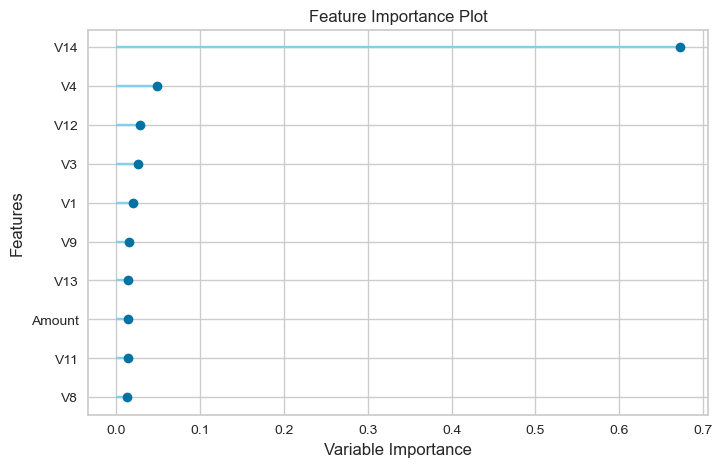

In [143]:
# Plotar a importância dos recursos do modelo XGBoost
plot_model(xgboost, plot='feature')

In [144]:
save_model(xgboost,'xgboost 28 de abril de 2024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                              'V7', 'V8', 'V9', 'V10', 'V11',
                                              'V12', 'V13', 'V14', 'V15', 'V16',
                                              'V17', 'V18', 'V19', 'V20', 'V21',
                                              'V22', 'V23', 'V24', 'V25', 'V26',
                                              'V27', 'V28', 'Amount'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               ke...
                                grow_policy=None, importance_type=None,
                 

In [145]:
model_saved = load_model('xgboost 28 de abril de 2024')

Transformation Pipeline and Model Successfully Loaded


In [146]:
model_saved.named_steps

{'numerical_imputer': TransformerWrapper(exclude=None,
                    include=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
                             'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
                             'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
                             'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
                             'Amount'],
                    transformer=SimpleImputer(add_indicator=False, copy=True,
                                              fill_value=None,
                                              keep_empty_features=False,
                                              missing_values=nan,
                                              strategy='mean',
                                              verbose='deprecated')),
 'categorical_imputer': TransformerWrapper(exclude=None, include=[],
                    transformer=SimpleImputer(add_indicator=False, copy=True,
                                          

In [147]:
#ajustando hiperparâmetros de um modelo de machine learning
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9977,0.9643,0.8571,0.4225,0.5660,0.5650,0.6009
1,0.9980,0.9804,0.7714,0.4655,0.5806,0.5797,0.5984
2,0.9969,1.0000,1.0000,0.3646,0.5344,0.5331,0.6029
3,0.9976,0.9839,0.9429,0.4177,0.5789,0.5779,0.6267
4,0.9970,0.9604,0.8529,0.3452,0.4915,0.4903,0.5416
5,0.9970,0.9945,0.9118,0.3563,0.5124,0.5112,0.5690
6,0.9976,0.9857,0.8529,0.4085,0.5524,0.5513,0.5893
7,0.9981,0.9992,0.9706,0.4714,0.6346,0.6338,0.6757
8,0.9979,0.9636,0.7941,0.4355,0.5625,0.5615,0.5872


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [148]:
#finalizando o treinamento de um modelo para deploy
final_xgboost = finalize_model(tuned_xgboost)

In [149]:
# avaliando o desempenho de um modelo de machine learning
evaluate_model(final_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

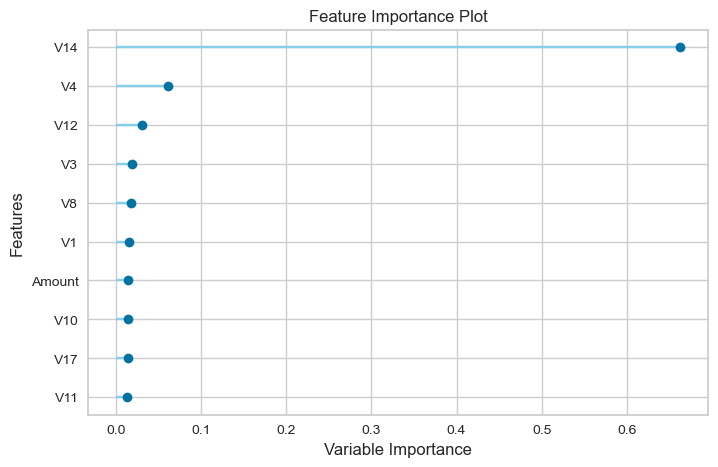

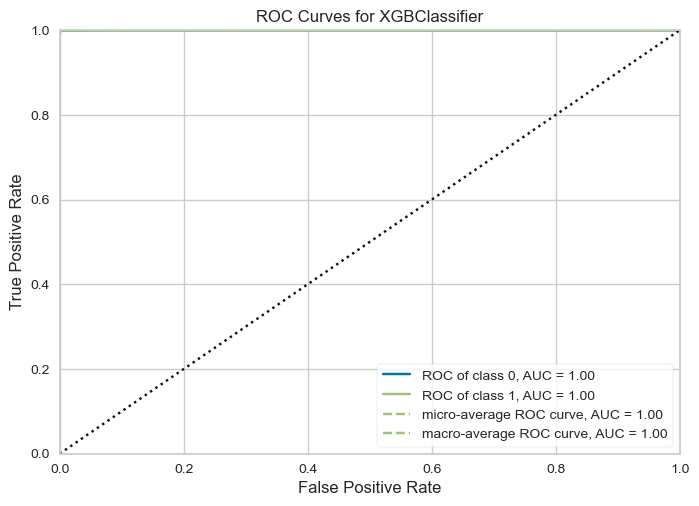

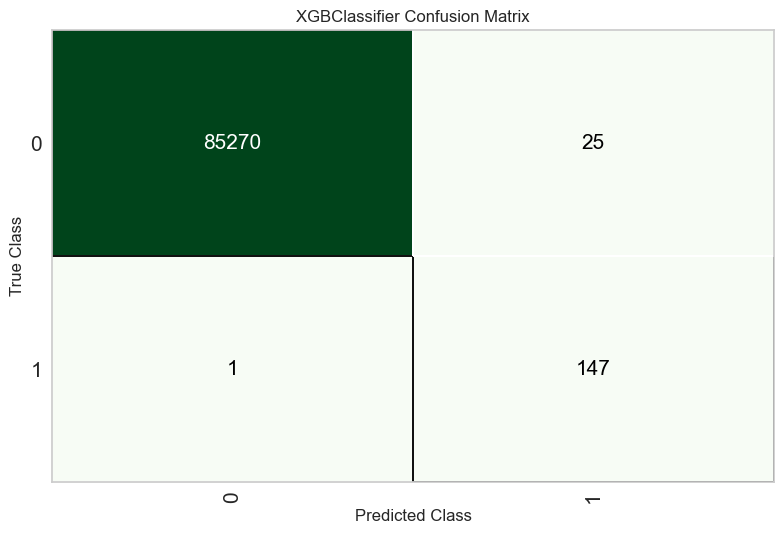

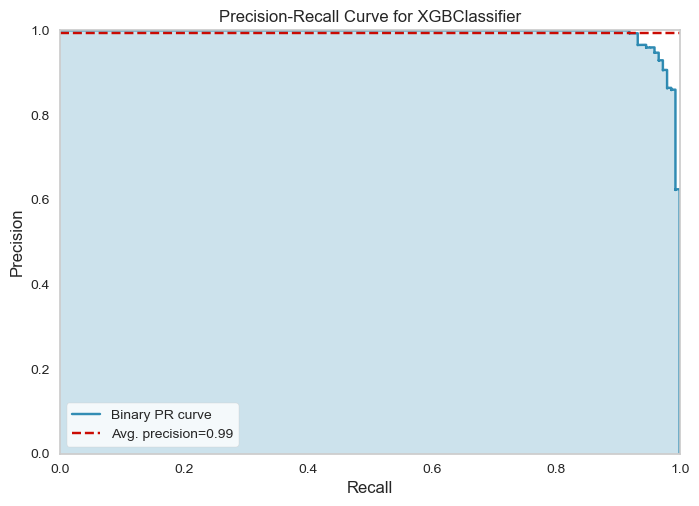

In [150]:
#Finalizando o modelo para deploy
#Importância das variáveis (Feature Importance) Plot
plot_model(final_xgboost, plot='feature')
# AUC Plot
plot_model(final_xgboost, plot='auc')
#Matriz de confusão (Confusion matrix)
plot_model(final_xgboost, plot='confusion_matrix')
#Precision-Recall Plot
plot_model(final_xgboost, plot='pr')

In [151]:
#Finalizando o modelo para deploy
final_xgboost = finalize_model(final_xgboost)

In [152]:
#Parâmetros finais do modelo para deploy
print(final_xgboost)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                             'V7', 'V8', 'V9', 'V10', 'V11',
                                             'V12', 'V13', 'V14', 'V15', 'V16',
                                             'V17', 'V18', 'V19', 'V20', 'V21',
                                             'V22', 'V23', 'V24', 'V25', 'V26',
                                             'V27', 'V28', 'Amount'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              ke...
                               grow_policy=None, importance_type=None,
                               

In [153]:
predict_model(final_xgboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9997,1.0000,0.9932,0.8547,0.9188,0.9186,0.9212


In [155]:
#Salvando o modelo final

save_model(final_xgboost,'Final xgboost Model 26 de Abril de 2024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                              'V7', 'V8', 'V9', 'V10', 'V11',
                                              'V12', 'V13', 'V14', 'V15', 'V16',
                                              'V17', 'V18', 'V19', 'V20', 'V21',
                                              'V22', 'V23', 'V24', 'V25', 'V26',
                                              'V27', 'V28', 'Amount'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               ke...
                                grow_policy=None, importance_type=None,
                 

In [156]:
#Carregando o modelo salvo
saved_final_xgboost = load_model('Final xgboost Model 26 de Abril de 2024')

Transformation Pipeline and Model Successfully Loaded
